In [46]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
 


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [47]:
df_dow = pd.read_csv('./dow.csv')


In [48]:
df_dow.columns =['Day_of_the_week','No_of_orders']

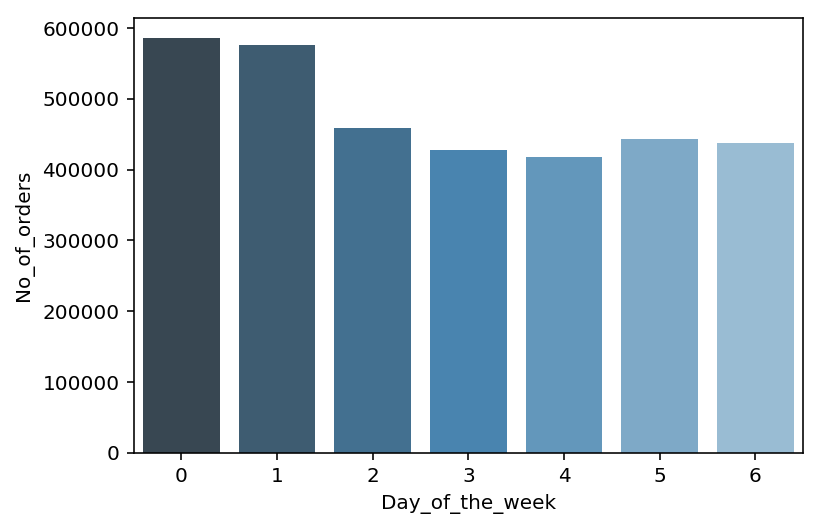

In [49]:
sns.barplot(x=df_dow['Day_of_the_week'],y =df_dow['No_of_orders'], color ='b',palette="Blues_d")


In [8]:
df_aisles = pd.read_csv('./sales_by_aisles.csv')
df_prod = pd.read_csv('./productwise _distribution_of sales.csv')

In [9]:
df = df_prod.head(30)

In [52]:
dept_df =pd.read_csv('./dept.csv')

In [53]:
dept_df.columns =['No_of_orders','Dept_id','Deaprtment_name']

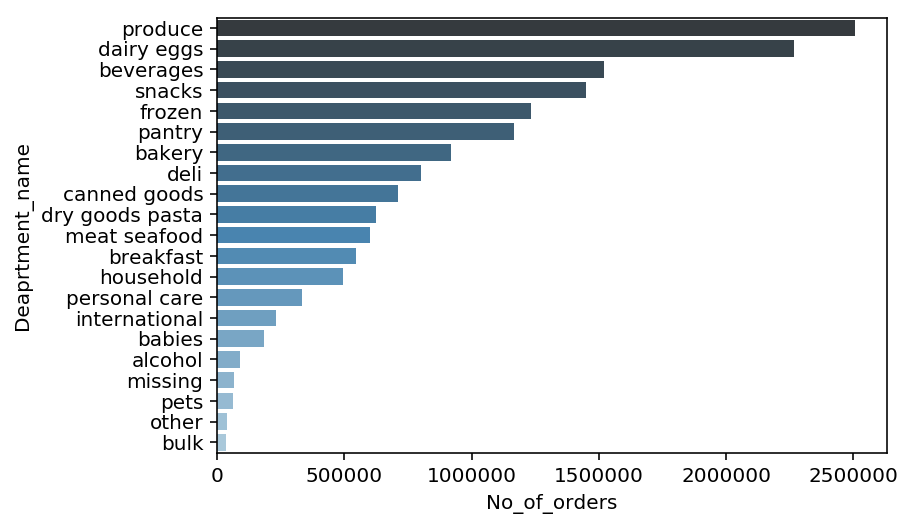

In [54]:
sns.barplot(x=dept_df['No_of_orders'],y =dept_df['Deaprtment_name'], color ='b',palette="Blues_d")


In [55]:
df.head()

,product_id,prod_name,count
0,24852,Banana,472565
1,13176,Bag of Organic Bananas,379450
2,21137,Organic Strawberries,264683
3,21903,Organic Baby Spinach,241921
4,47209,Organic Hass Avocado,213584


In [2]:
# sns.barplot(x=df['count'],y =df['prod_name'], color ='b','color'=['yellow','read'] ,palette="Blues_d")

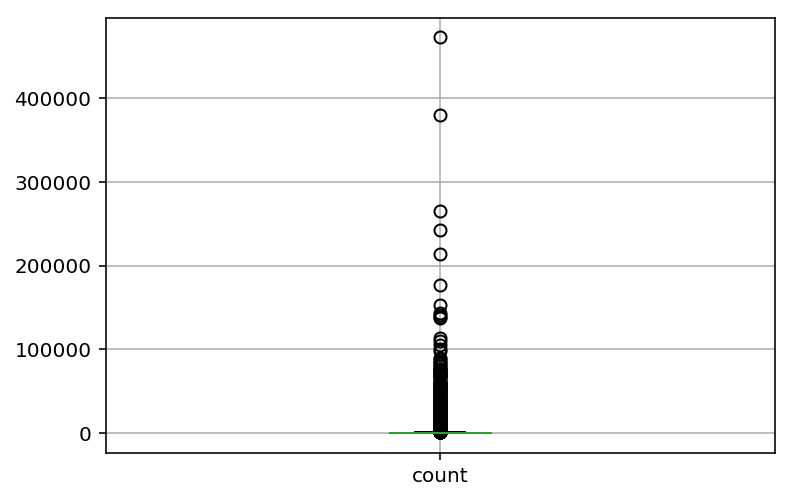

In [56]:
df_prod[['count']].boxplot()

In [16]:
df_aisles.shape

(134, 3)

In [17]:
df_aisles.head()

,aisles_id,count,aisles
0,24,3642188,fresh fruits
1,83,3418021,fresh vegetables
2,123,1765313,packaged vegetables fruits
3,120,1452343,yogurt
4,21,979763,packaged cheese


In [18]:
df_aisles.columns =['aisles_id','No_of_Orders','aisles']

In [19]:
df_a =df_aisles.head(30)
df_a['count in thousands']  =df_a['No_of_Orders'].map(lambda x: x/1000) 
df_a.head()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,aisles_id,No_of_Orders,aisles,count in thousands
0,24,3642188,fresh fruits,3642.188
1,83,3418021,fresh vegetables,3418.021
2,123,1765313,packaged vegetables fruits,1765.313
3,120,1452343,yogurt,1452.343
4,21,979763,packaged cheese,979.763


In [1]:
# df_dept = pd.read_csv('./departments.csv')
# df_ord = pd.read_csv('./orders.csv')
# df_ord_prod =pd.read_csv('./order_products__prior.csv')
# df_aisles = pd.read_csv('./aisles.csv')
# df_prod = pd.read_csv('./products.csv')

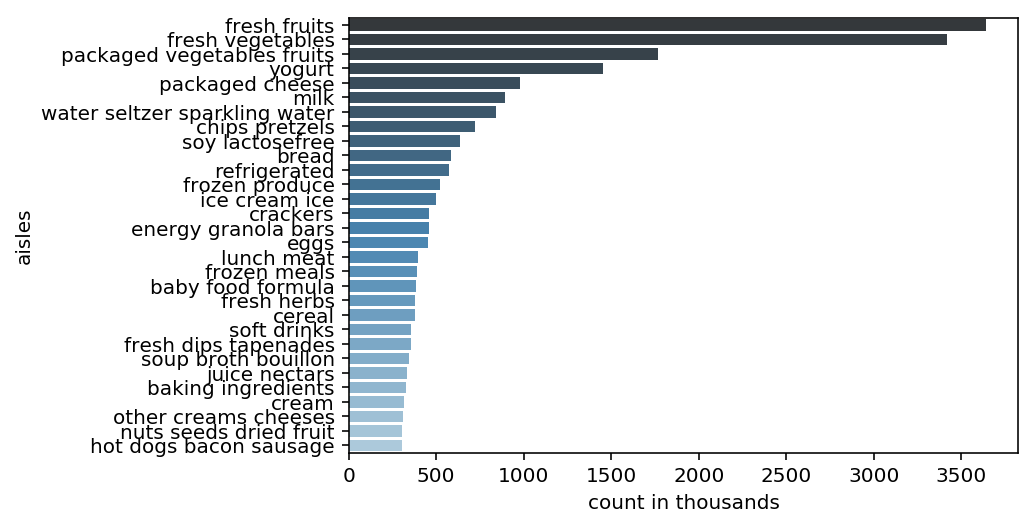

In [20]:
sns.barplot(x=df_a['count in thousands'],y =df_a['aisles'], color ='b',palette="Blues_d")
cl4.groupby(['product_name'])['order_id'].count().sort_values(ascending=False).head(20).plot(kind ='bar',figsize=(15,12) )

In [41]:
df_ord_hour =pd.read_csv('./hour_of_day_sales.csv')

In [42]:
df_ord_hour.head()

,order_hour_of_day,count
0,0,21372
1,1,11596
2,2,7070
3,3,5120
4,4,5175


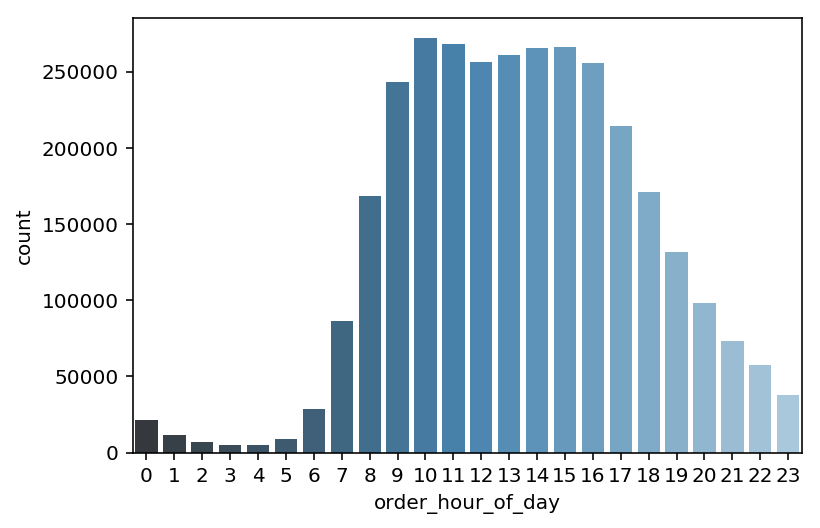

In [127]:
sns.barplot(x=df_ord_hour['order_hour_of_day'],y =df_ord_hour['count'], color ='b',palette="Blues_d")

In [44]:
df_ord_reorder =pd.read_csv('./order_reorderitems.csv')

In [22]:
df_ord_freq =pd.read_csv('./ord_freq.csv')
df_ord_freq.head()

,ord_freq,count
0,0.0,67755
1,1.0,145247
2,2.0,193206
3,3.0,217005
4,4.0,221696


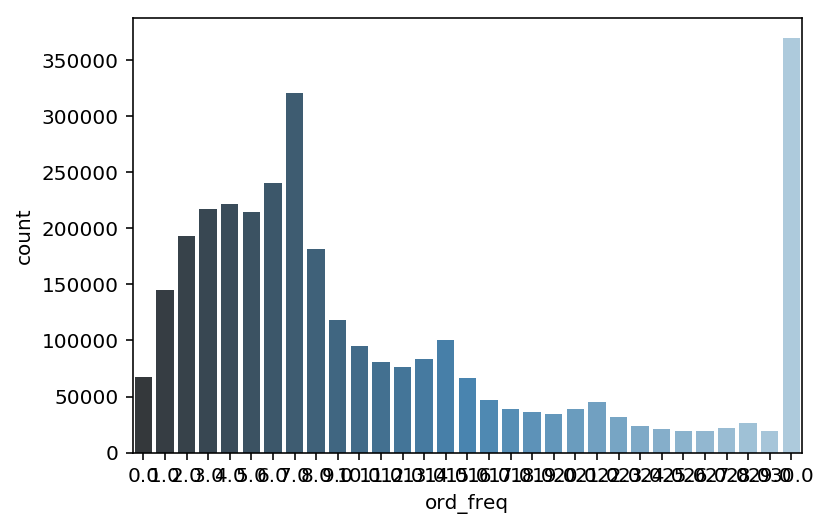

In [31]:
sns.barplot(x=df_ord_freq['ord_freq'],y =df_ord_freq['count'], color ='b',palette="Blues_d")
# df_ord_freq.plot(kind ='bar',x=df_ord_freq['ord_freq'],y =df_ord_freq['count'],figsize=(15,12) )

In [45]:
df_ord_reorder.head()

,order_id,sum,count
0,1564244,80,145
1,790903,130,137
2,61355,4,127
3,2970392,85,121
4,2069920,107,116


In [48]:
df_reorder_ratio =df_ord_reorder[['sum','count']]

In [49]:
df_reorder_ratio.columns =['No_of_order_items','No_of_reorder_items']

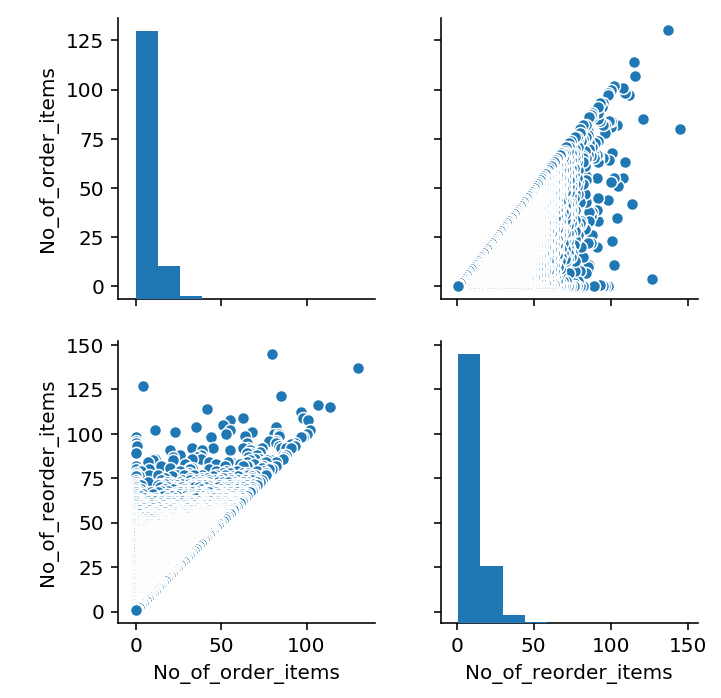

In [50]:
sns.pairplot(df_reorder_ratio)
            

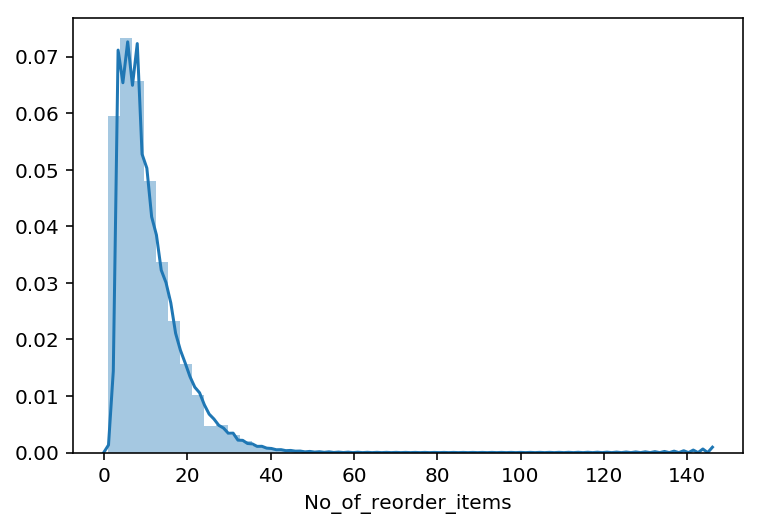

In [52]:
sns.distplot(df_reorder_ratio['No_of_reorder_items'])

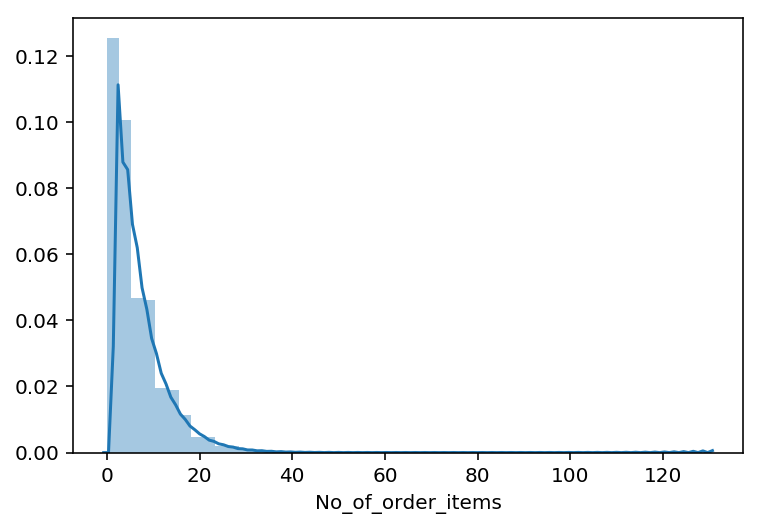

In [53]:
sns.distplot(df_reorder_ratio['No_of_order_items'])

In [68]:
df_user =pd.read_csv('./order_user_plot.csv')

In [70]:
df_user.columns =['No_of_Orders','Users']

In [82]:
df_user1 =df_user.head(30)

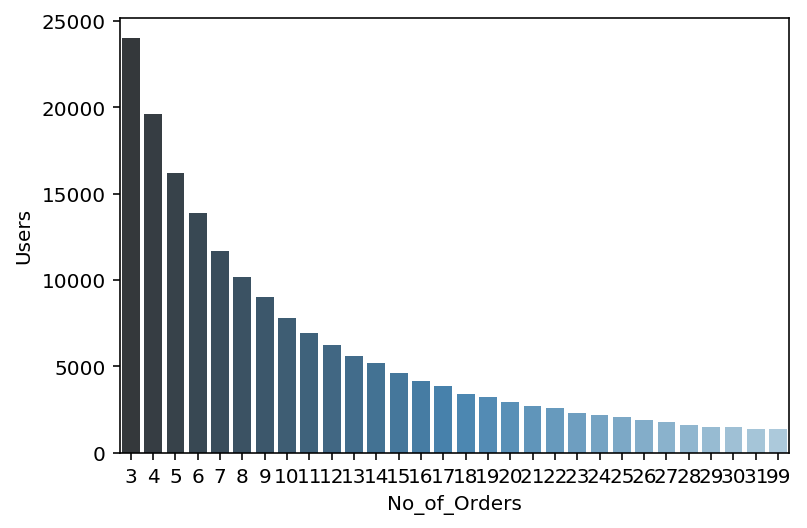

In [128]:
sns.barplot(x=df_user1['No_of_Orders'],y =df_user1['Users'], color ='b',palette="Blues_d")
           

In [84]:
df_rel =pd.read_csv('./reorder_to_aisle_daysafter.csv')

In [85]:
df_rel.head()

,user_id,order_id,aisle_count,prod_count,reord_count,day_since_prior_order
0,1,3367565,4,4,4,19.0
1,1,3108588,5,6,4,14.0
2,1,2539329,4,5,0,NaN
3,1,2550362,8,9,6,30.0
4,1,431534,5,8,5,28.0


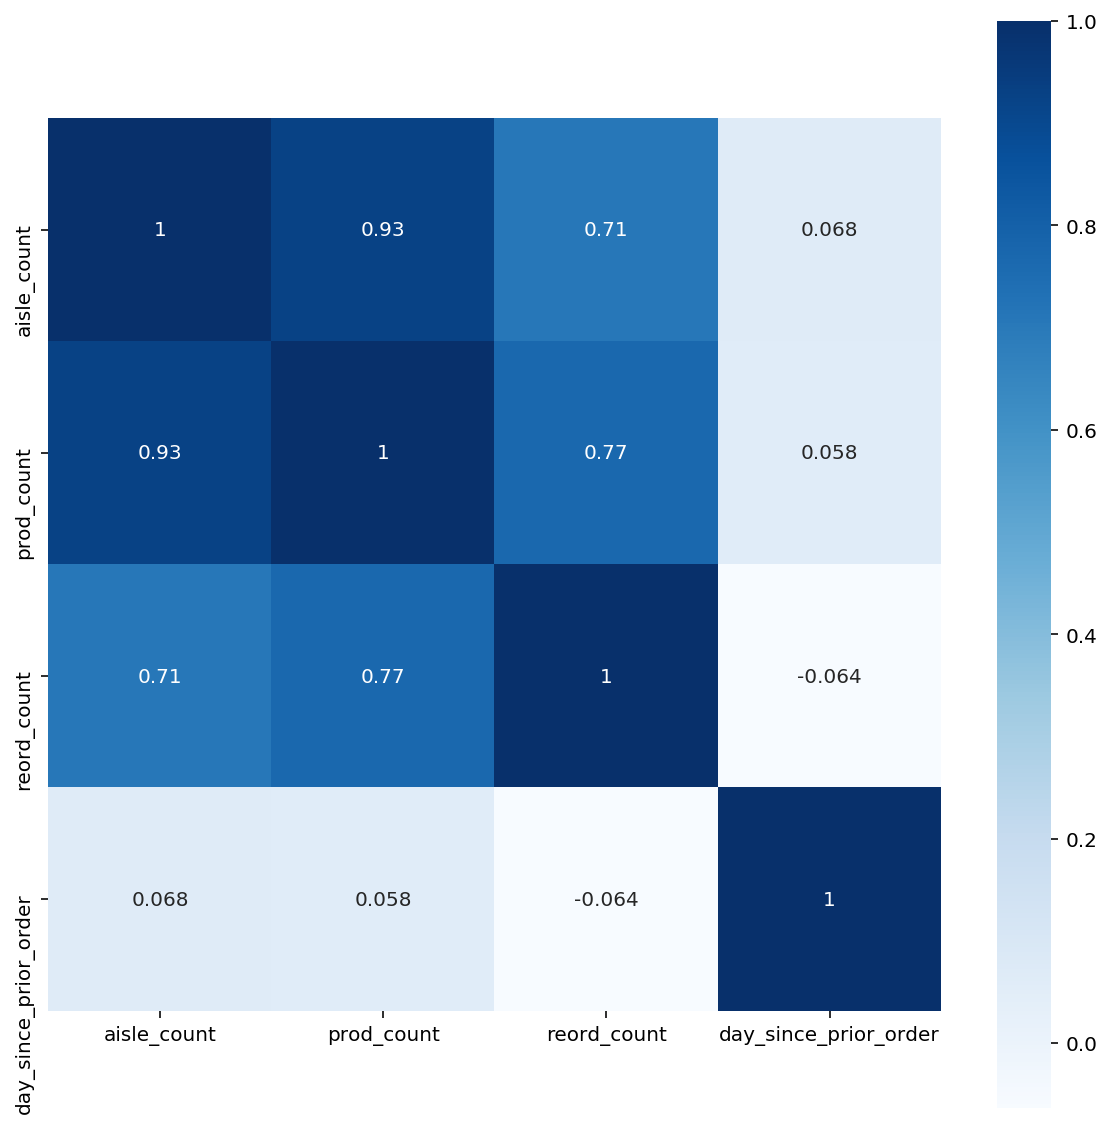

In [88]:
df_rel1 =df_rel[['aisle_count','prod_count','reord_count','day_since_prior_order']]
df_rel_corr =df_rel1.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_rel_corr,square=True,annot=True,cmap="Blues",ax=ax)

In [32]:
df_reorder =pd.read_csv('./reorder_percentage_count.csv')

In [38]:
df_plot =df_reorder.head(30)

In [39]:
df_plot

,Percentage,No_of_Orders
0,100.0,695006
1,50.0,187878
2,0.0,182304
3,67.0,136386
4,75.0,101879
5,33.0,92752
6,80.0,78320
7,60.0,64920
8,83.0,63703
9,25.0,55699


In [34]:
df_reorder.columns =['Percentage','No_of_Orders']

In [35]:
df_plot =df_reorder.head(15)

In [36]:
df_plot

,Percentage,No_of_Orders
0,100.0,695006
1,50.0,187878
2,0.0,182304
3,67.0,136386
4,75.0,101879
5,33.0,92752
6,80.0,78320
7,60.0,64920
8,83.0,63703
9,25.0,55699


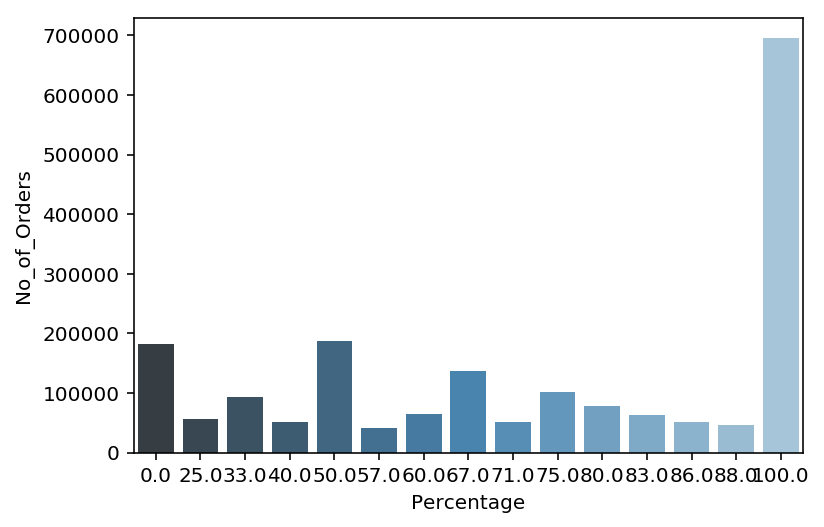

In [37]:
sns.barplot(x=df_plot['Percentage'],y =df_plot['No_of_Orders'], color ='b',palette="Blues_d")

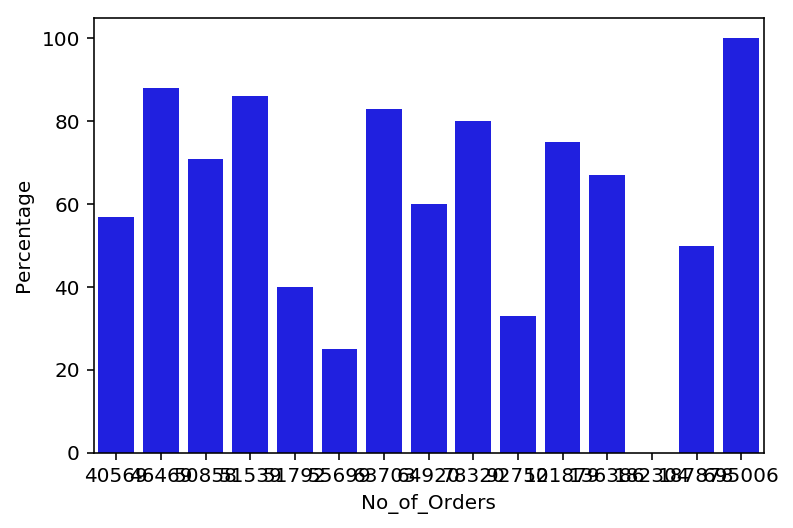

In [122]:
sns.barplot(x=df_plot['No_of_Orders'],y =df_plot['Percentage'], color ='b')